In [101]:
import pandas as pd
import numpy as np
from charset_normalizer import from_path
import glob
import matplotlib.pyplot as plt
import torch
import random

In [2]:
csv_path = glob.glob("data/*.csv")
print("CSV file path:", csv_path)

best_enc = from_path(csv_path[0]).best().encoding
print("Suggested encoding:", best_enc)

CSV file path: ['data\\Houses.csv']
Suggested encoding: cp1250


In [3]:
house_data = pd.read_csv(csv_path[0], encoding=best_enc)

print("Shape:", house_data.shape, '\n')
house_data.head(3)

Shape: (23764, 11) 



,Unnamed: 0,address,city,floor,id,latitude,longitude,price,rooms,sq,year
0,0,Podgórze Zabłocie Stanisława Klimeckiego,Kraków,2.0,23918.0,50.049224,19.970379,749000.0,3.0,74.05,2021.0
1,1,Praga-Południe Grochowska,Warszawa,3.0,17828.0,52.249775,21.106886,240548.0,1.0,24.38,2021.0
2,2,Krowodrza Czarnowiejska,Kraków,2.0,22784.0,50.066964,19.920025,427000.0,2.0,37.00,1970.0


In [4]:
wwa_data = house_data[house_data.city == 'Warszawa'].copy()

print("Shape:", wwa_data.shape, '\n')
wwa_data.head(3)

Shape: (9851, 11) 



,Unnamed: 0,address,city,floor,id,latitude,longitude,price,rooms,sq,year
1,1,Praga-Południe Grochowska,Warszawa,3.0,17828.0,52.249775,21.106886,240548.0,1.0,24.38,2021.0
4,4,Ochota Gotowy budynek. Stan deweloperski. Osta...,Warszawa,1.0,11770.0,52.212225,20.972630,996000.0,5.0,105.00,2020.0
7,7,Mokotów Pory,Warszawa,10.0,13308.0,52.184058,21.044302,2890000.0,6.0,280.00,2003.0


In [5]:
wwa_data = wwa_data.drop(columns=['Unnamed: 0', 'address', 'city', 'id', 'latitude', 'longitude', 'floor'], errors='ignore')
wwa_data.head(3)

,price,rooms,sq,year
1,240548.0,1.0,24.38,2021.0
4,996000.0,5.0,105.00,2020.0
7,2890000.0,6.0,280.00,2003.0


In [6]:
wwa_data.describe()

,price,rooms,sq,year
count,9.851000e+03,9851.000000,9851.000000,9851.000000
mean,7.806199e+05,2.627347,62.704040,1996.071262
std,7.063321e+05,1.012861,95.529845,49.625532
min,5.000000e+03,1.000000,8.800000,75.000000
25%,4.650000e+05,2.000000,43.000000,1975.000000
50%,5.950000e+05,3.000000,54.300000,2008.000000
75%,8.250000e+05,3.000000,70.500000,2020.000000
max,1.500000e+07,10.000000,9000.000000,2980.000000


In [7]:
# for col in wwa_data.columns:
#     print(f"Sorted by: |{col}|")
#     print(wwa_data.sort_values(by=col).head(), '\n')

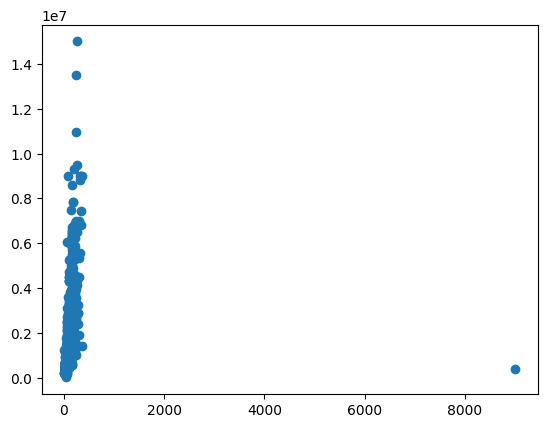

In [8]:
plt.scatter(x = wwa_data.sq, y = wwa_data.price)
plt.show()
plt.close()

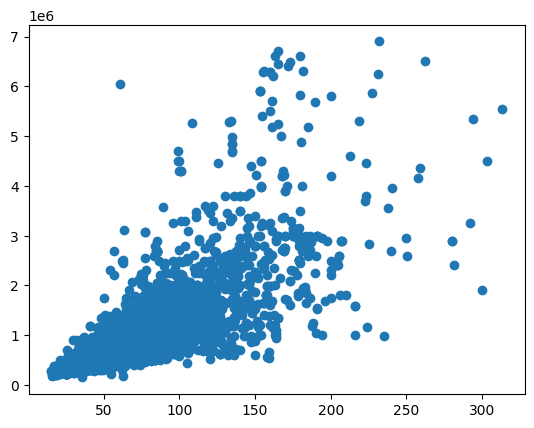

In [9]:
wwa_data = wwa_data[(wwa_data.price > 100000.0) & (wwa_data.sq > 15.0) & (7000000.0 > wwa_data.price) & (325.0 > wwa_data.sq)]

plt.scatter(x = wwa_data.sq, y = wwa_data.price)
plt.show()
plt.close()

In [10]:
wwa_data['price_per_m2'] = wwa_data['price'] / wwa_data['sq']
wwa_data = wwa_data[(wwa_data['price_per_m2'] > 5000.0) & (wwa_data['price_per_m2'] < 45000.0)]

print('Stats for: |price_per_m2|')
print(wwa_data.describe()['price_per_m2'], '\n')

wwa_data.head(3)

Stats for: |price_per_m2|
count     9798.000000
mean     12165.381782
std       3870.252100
min       5149.484536
25%       9744.501098
50%      11517.725560
75%      13585.714286
max      44900.000000
Name: price_per_m2, dtype: float64 



,price,rooms,sq,year,price_per_m2
1,240548.0,1.0,24.38,2021.0,9866.611977
4,996000.0,5.0,105.00,2020.0,9485.714286
7,2890000.0,6.0,280.00,2003.0,10321.428571


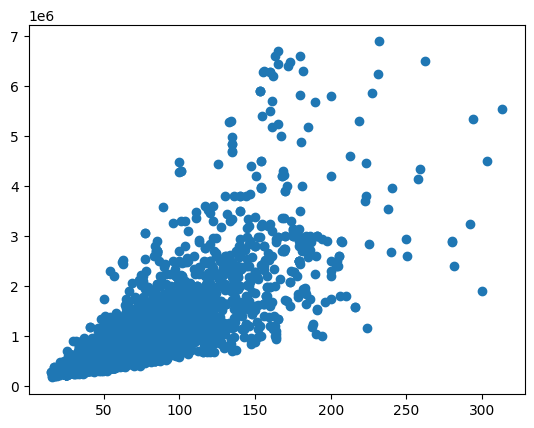

In [11]:
plt.scatter(x = wwa_data.sq, y = wwa_data.price)
plt.show()
plt.close()

In [12]:
wwa_data['year'] = 2026.0 - wwa_data['year']
wwa_data.rename(columns={'year': 'age'}, inplace=True)
wwa_data = wwa_data.drop(columns=['price_per_m2'])
wwa_data = wwa_data[(wwa_data.age > 0.0) & (wwa_data.age < 500.0)]

print("Shape:", wwa_data.shape, '\n')
wwa_data.head()

Shape: (9791, 4) 



,price,rooms,sq,age
1,240548.0,1.0,24.38,5.0
4,996000.0,5.0,105.00,6.0
7,2890000.0,6.0,280.00,23.0
8,615000.0,4.0,63.40,44.0
9,429000.0,1.0,40.00,27.0


Shape: (9791, 4) 



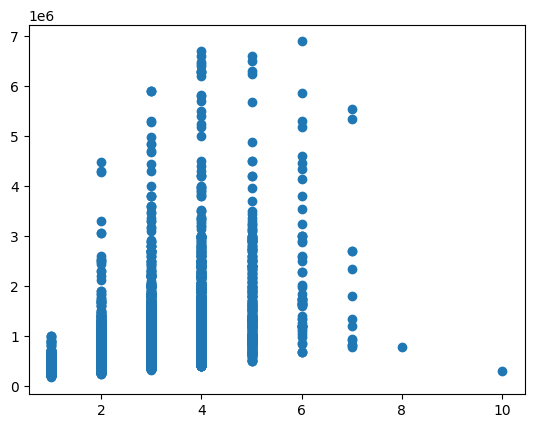

In [13]:
print("Shape:", wwa_data.shape, '\n')

plt.scatter(x = wwa_data.rooms, y = wwa_data.price)
plt.show()
plt.close()

In [35]:
wwa_data = wwa_data.sample(frac=1).reset_index(drop=True)
wwa_data.describe()

,price,rooms,sq,age
count,9.791000e+03,9791.000000,9791.000000,9791.000000
mean,7.642286e+05,2.621796,61.340697,29.125728
std,5.983000e+05,1.003798,30.336978,27.351979
min,1.770000e+05,1.000000,15.330000,2.000000
25%,4.650000e+05,2.000000,42.990000,6.000000
50%,5.950000e+05,3.000000,54.030000,18.000000
75%,8.200000e+05,3.000000,70.260000,51.000000
max,6.900000e+06,10.000000,313.180000,266.000000


In [36]:
wwa_data.head()

,price,rooms,sq,age
0,550000.0,2.0,44.10,55.0
1,570000.0,2.0,46.94,63.0
2,488000.0,4.0,69.83,5.0
3,639000.0,3.0,50.00,5.0
4,869123.0,4.0,90.00,6.0


In [37]:
sigma_y = wwa_data[['price']].copy()
sigma_X = wwa_data[['sq', 'rooms', 'age']].copy()
print("y:", sigma_y.head(), '\n')
print("X:", sigma_X.head(), '\n')

y:       price
0  550000.0
1  570000.0
2  488000.0
3  639000.0
4  869123.0 

X:       sq  rooms   age
0  44.10    2.0  55.0
1  46.94    2.0  63.0
2  69.83    4.0   5.0
3  50.00    3.0   5.0
4  90.00    4.0   6.0 



In [66]:
sigten_y = torch.tensor(sigma_y.values, dtype=torch.float32)
sigten_X = torch.tensor(sigma_X.values, dtype=torch.float32)
print(len(sigten_X))
print("y:", sigten_y, '\n')
print("X:", sigten_X, '\n')

9791
y: tensor([[550000.],
        [570000.],
        [488000.],
        ...,
        [850000.],
        [360000.],
        [491485.]]) 

X: tensor([[ 44.1000,   2.0000,  55.0000],
        [ 46.9400,   2.0000,  63.0000],
        [ 69.8300,   4.0000,   5.0000],
        ...,
        [134.0000,   5.0000,  14.0000],
        [ 30.0000,   1.0000,  13.0000],
        [ 42.9800,   2.0000,   4.0000]]) 



In [68]:
standar_trainX = sigten_X[:7800]
sigten_mean = torch.mean(standar_trainX, dim=0)
sigten_std = torch.std(standar_trainX, dim=0)
print("Mean:", sigten_mean)
print("Std:", sigten_std)

Mean: tensor([61.3592,  2.6174, 29.0624])
Std: tensor([30.5592,  1.0052, 27.3946])


In [64]:
(sigten_X[0][1] - sigten_mean[1]) / sigten_std[1]

tensor(-0.6142)

In [59]:
ready_X = (sigten_X - sigten_mean) / sigten_std
ready_X

tensor([[-0.5648, -0.6142,  0.9468],
        [-0.4718, -0.6142,  1.2388],
        [ 0.2772,  1.3754, -0.8784],
        ...,
        [ 2.3771,  2.3702, -0.5498],
        [-1.0262, -1.6091, -0.5863],
        [-0.6014, -0.6142, -0.9149]])

In [32]:
# fig = plt.figure(figsize =(5, 4))
# ax = fig.add_axes([0, 0, 1, 1])
# bp = ax.boxplot(sigma_X_train)

# plt.show()

In [199]:
class WwaHousingData():
    def __init__(self, df, num_train=7800, batch_size=32):
        self.num_train = num_train
        self.num_val = len(df) - num_train
        self.batch_size = batch_size
        
        df_y = df[['price']].copy()
        df_X = df[['sq', 'rooms', 'age']].copy()
        
        self.y = torch.tensor(df_y.values, dtype=torch.float32)
        tensor_X = torch.tensor(df_X.values, dtype=torch.float32)
        
        self.stand_mean = torch.mean(tensor_X[:num_train], dim=0)
        self.stand_std = torch.std(tensor_X[:num_train], dim=0)
        self.X = (tensor_X - self.stand_mean) / self.stand_std

    def get_dataloader(self, train):
        if train:
            indices = list(range(0, self.num_train))
            random.shuffle(indices)
        else:
            indices = list(range(self.num_train, self.num_train+self.num_val))
        for i in range(0, len(indices), self.batch_size):
            batch_indices= torch.tensor(indices[i : i+self.batch_size])
            #print(batch_indices)
            yield self.X[batch_indices], self.y[batch_indices]

    def train_dataloader(self):
        return self.get_dataloader(train=True)

    def val_dataloader(self):
        return self.get_dataloader(train=False)

In [200]:
class LinearRegressionModel():
    def __init__(self, num_params, l_rate, sigma=0.01):
        self.w = torch.normal(mean=0, std=sigma, size=(num_params, 1), requires_grad=True)
        self.b = torch.zeros(1, requires_grad=True)
        self.l_rate = l_rate
        self.val_tab = []
        self.train_tab = []
        
    def forward(self, X):
        return torch.matmul(X, self.w) + self.b

    def loss(self, y_hat, y):
        l = (y_hat - y) ** 2 / 2
        return l.mean()

    def configure_optimizers(self):
        return SGD([self.w, self.b], self.l_rate)

    def training_step(self, batch):
        l = self.loss(self.forward(batch[0]), batch[-1])
        print(l)
        return l

    def validation_step(self, batch):
        l = self.loss(self.forward(batch[0]), batch[-1])
        self.val_tab.append(l.detach().item())

In [201]:
class SGD():
    def __init__(self, params, l_rate):
        self.params = params
        self.l_rate = l_rate

    def step(self):
        with torch.no_grad():
            for param in self.params:
                param -= self.l_rate * param.grad

    def zero_grad(self):
        for param in self.params:
            if param.grad is not None:
                param.grad.zero_()

In [202]:
class Trainer():
    def __init__(self, num_epochs):
        self.num_epochs = num_epochs

    def prepare_data(self, data):
        self.train_dataloader = data.train_dataloader()
        self.val_dataloader = data.val_dataloader()
        #self.num_train_batches = len(self.train_dataloader)
        #self.num_val_batches = len(self.val_dataloader)

    def fit(self, model, data):
        self.prepare_data(data)
        self.model = model
        self.optim = model.configure_optimizers()
        self.epoch = 0
        #self.train_batch_idx = 0
        #self.val_batch_idx = 0
        for self.epoch in range(self.num_epochs):
            self.fit_epoch()

    def fit_epoch(self):
        #self.model.train()
        for batch in self.train_dataloader:
            loss = self.model.training_step(batch)
            self.optim.zero_grad()
            #with torch.no_grad():
            loss.backward()
                # if self.gradient_clip_val > 0:  # To be discussed later
                #     self.clip_gradients(self.gradient_clip_val, self.model)
            self.optim.step()
            #self.train_batch_idx += 1
        if self.val_dataloader is None:
            return
        #self.model.eval()
        for batch in self.val_dataloader:
            with torch.no_grad():
                self.model.validation_step(batch)
            #self.val_batch_idx += 1

In [203]:
data = WwaHousingData(wwa_data)
model = LinearRegressionModel(3, 0.000001)
trainer = Trainer(5)
trainer.fit(model, data)

tensor(8.5047e+11, grad_fn=<MeanBackward0>)
tensor(3.1174e+11, grad_fn=<MeanBackward0>)
tensor(2.9203e+11, grad_fn=<MeanBackward0>)
tensor(3.1892e+11, grad_fn=<MeanBackward0>)
tensor(4.0661e+11, grad_fn=<MeanBackward0>)
tensor(4.8802e+11, grad_fn=<MeanBackward0>)
tensor(4.3005e+11, grad_fn=<MeanBackward0>)
tensor(7.3934e+11, grad_fn=<MeanBackward0>)
tensor(3.1905e+11, grad_fn=<MeanBackward0>)
tensor(2.6547e+11, grad_fn=<MeanBackward0>)
tensor(4.5856e+11, grad_fn=<MeanBackward0>)
tensor(3.8455e+11, grad_fn=<MeanBackward0>)
tensor(2.7953e+11, grad_fn=<MeanBackward0>)
tensor(6.7433e+11, grad_fn=<MeanBackward0>)
tensor(3.2435e+11, grad_fn=<MeanBackward0>)
tensor(4.3311e+11, grad_fn=<MeanBackward0>)
tensor(4.1795e+11, grad_fn=<MeanBackward0>)
tensor(5.8318e+11, grad_fn=<MeanBackward0>)
tensor(3.4199e+11, grad_fn=<MeanBackward0>)
tensor(6.2431e+11, grad_fn=<MeanBackward0>)
tensor(3.6687e+11, grad_fn=<MeanBackward0>)
tensor(2.3943e+11, grad_fn=<MeanBackward0>)
tensor(4.1317e+11, grad_fn=<Mean

In [204]:
with torch.no_grad():
    print(model.w, model.b)

tensor([[116.8354],
        [ 76.5185],
        [ -5.4402]], requires_grad=True) tensor([186.8430], requires_grad=True)


In [206]:
with torch.no_grad():
    print(model.train_tab)

[]


In [89]:
print(data.num_val)

1991


In [84]:
print(data.y)

print(data.X)

print(data.stand_mean)

print(data.stand_std)

tensor([[550000.],
        [570000.],
        [488000.],
        ...,
        [850000.],
        [360000.],
        [491485.]])
tensor([[-0.5648, -0.6142,  0.9468],
        [-0.4718, -0.6142,  1.2388],
        [ 0.2772,  1.3754, -0.8784],
        ...,
        [ 2.3771,  2.3702, -0.5498],
        [-1.0262, -1.6091, -0.5863],
        [-0.6014, -0.6142, -0.9149]])
tensor([61.3592,  2.6174, 29.0624])
tensor([30.5592,  1.0052, 27.3946])
